<a href="https://colab.research.google.com/github/Ritil-Ranjan/Youtube/blob/main/Youtube_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install indic-transliteration
# !pip install nltk
# !pip install regex
# !pip install textblob
!pip install langdetect
!pip install emoji
# !pip install spacy
!pip install rapidfuzz

In [ ]:
import string
from rapidfuzz import fuzz
from tqdm import tqdm
import pandas as pd
from googleapiclient.discovery import build
# from indic_transliteration.sanscript import transliterate, ITRANS, DEVANAGARI
from langdetect import detect
from indic_transliteration.sanscript import SchemeMap, SCHEMES, transliterate
from textblob import TextBlob
import regex as re
import pandas as pd
import numpy as np
import emoji
from collections import defaultdict
from difflib import get_close_matches
import spacy
nlp = spacy.load('en_core_web_sm')
from IPython.display import display, HTML
import difflib
import nltk
from nltk.corpus import words
from nltk.corpus import stopwords
from google.colab import files
from collections import Counter
from itertools import chain
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
uploaded = files.upload()

Saving dhruv_rathee9.csv to dhruv_rathee9.csv


In [ ]:
chat_words = { "u": "you",
     "r": "are",
     "brb": "be right back",
    "btw": "by the way",
    "omg": "oh my god",
    "lol": "laugh out loud",
    "ttyl": "talk to you later",
    "rofl": "rolling on the floor laughing",
    "smh": "shaking my head",
    "fyi": "for your information",
    "lmao": "laughing my ass off",
    "idk": "I don't know",
    "fomo": "fear of missing out",
    "gtg": "got to go",
    "yolo": "you only live once",
    "tbh": "to be honest",
    "omw": "on my way",
    "np": "no problem",
    "brb": "be right back",
    "wyd": "what are you doing",
    "bff": "best friends forever",
    "gtfo": "get the f*** out",
    "ttys": "talk to you soon",
    "asap": "as soon as possible",
    "plz": "please",
    "thx": "thanks",
    "xoxo": "hugs and kisses",
    "lmfao": "laughing my f***ing ass off",
    "srsly": "seriously",
    "cya": "see you",
    "wbu": "what about you",
    "bbl": "be back later",
    "pov": "point of view",
    "stfu": "shut the f*** up",
    "mfw": "my face when",
    "yass": "yes",
    "tfw": "that feeling when",
    "zomg": "oh my god",
    "iykyk": "if you know you know"}

df = pd.read_csv("dhruv_rathee5.csv")
df = df.drop(columns = df.columns[[0, 1]])

def chat_conversion(text1):
  new_text = []
  for text in text1.strip().split('\n'):
    new_text1 = []
    for w in text.split():
      if w.lower() in chat_words:
        new_text1.append(chat_words[w.lower()])
      else:
        new_text1.append(w)
    new_text1 = " ".join(new_text1)
    new_text.append(new_text1)
  return "\n".join(new_text)
df['text'] = df['text'].apply(chat_conversion)

def print_set(s, max_line_length=140):
    line = ""
    for item in s:  # sort if you want consistency
        item_str = str(item)
        # Check if adding the next item would exceed the max length
        if len(line) + len(item_str) + 2 > max_line_length:
            #print(',')
            print(line.rstrip(', '))
            line = ""
        line += item_str + ", "
    if line:
        print(line.rstrip(', '))

df_dict = dict();
for text in df['text'][:300]:
  parts = re.split(r'[ \n]', text)
  parts = [part.strip() for part in parts if part.strip()]
  for word in parts:
    if word not in df_dict:
      df_dict[word] = 0
    df_dict[word] += 1
df_dict = pd.DataFrame(list(df_dict.items()), columns = ['word', 'count'])
df_dict = df_dict.sort_values(by=['count'], ascending=False)

In [ ]:
df.shape

(14280, 7)

In [ ]:
sent_count = 0
word_count = 0
for text in df['text']:
  para = str(text).split('\n')
  sent_count += len(para)
  for sent in para:
    word_count += len(sent.split())
print(sent_count)
print(word_count)

23576
276857


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13291 entries, 0 to 14279
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   text          13291 non-null  object 
 1   likes         13291 non-null  int64  
 2   Date          13291 non-null  object 
 3   Time          13291 non-null  object 
 4   confidence    13291 non-null  object 
 5   hindi_ratio2  13291 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 726.9+ KB


In [ ]:
df.head()

,text,likes,Date,Time,confidence,hindi_ratio,hindi_ratio2
0,hail india,0,2025-05-31,07:39:17,[0.16971871],0.000000,0.0
1,well done brother,6,2025-05-31,12:07:48,[0.8321717],0.000000,0.0
2,god bless dhruv rathi,1,2025-05-31,13:45:37,[0.3843325],0.083333,0.0
3,watch (fasil warich ),1,2025-05-31,07:38:51,[0.5893226],0.000000,0.0
4,long live unity india,0,2025-05-31,08:59:36,[0.20433551],0.000000,0.0


In [ ]:
df_dict.head()

In [ ]:
df_dict.info()

In [ ]:
def hindi_ratio(text):
  words = text.lower().split()
  match_count = sum(1 for word in words if word in hindi_stopwords)
  return match_count/len(words)
df['hindi_ratio2'] = df['text'].apply(hindi_ratio)
df = df.sort_values(by = ['hindi_ratio2'], ascending=False)

In [ ]:
sns.histplot(df['hindi_ratio2'], bins = 100)

In [ ]:
df = df[df['hindi_ratio'] < 0.2]

In [ ]:
df_hindi.info()

In [ ]:
df_hindi = df_hindi.sort_values(by=['confidence'], ascending=False)

In [ ]:
df_dict = dict();
for text in df_hindi['text']:
  parts = re.split(r'[ \n]', text)
  parts = [part.strip() for part in parts if part.strip()]
  for word in parts:
    if word not in df_dict:
      df_dict[word] = 0
    df_dict[word] += 1

df_dict = dict(sorted(df_dict.items(), key=lambda item: item[1], reverse=True))
df_dict.keys()

dict_keys(['hai', 'bhi', 'bhai', 'ho', 'ke', 'ki', 'ko', 'ka', 'ap', 'pakistan', 'raha', 'kya', 'nahi', 'india', 'tum', 'nhi', 'jo', 'hain', 'ye', 'sab', 'kuch', 'tu', 'liye', 'baat', 'kar', 'to', 'se', 'ne', 'aur', 'desh', 'koi', 'rahe', 'kiya', 'bol', 'sach', 'na', 'wo', 'main', 'hota', 'tha', 'dhruv', 'hi', 'log', 'ha', 'ya', 'khilaf', 'hum', 'ek', 'kr', 'hamla', 'de', 'jab', 'indian', 'video', 'kia', 'lekin', 'apne', 'germany', 'khud', 'logo', 'mein', 'pata', 'h', 'mai', 'hy', 'sath', 'ny', 'pakistani', 'or', 'bata', 'bola', 'jhoot', 'he', 'muslim', 'bat', 'modi', 'bolta', 'apni', 'me', 'nahin', 'insan', 'tho', 'hindu', 'nai', 'kabhi', 'proof', 'k', 'par', 'diya', 'ab', 'pr', 'attack', 'pe', 'rha', 'sahi', 'bharat', 'ma', 'aaj', 'sirf', 'ni', 'karte', 'yeh', 'kisi', 'toh', 'army', 'sakta', 'news', 'indians', 'jhut', 'b', 'per', 'channel', 'har', 'country', 'is', 'ham', 'nafrat', 'hote', '..', 'batao', 'jhoota', 'rafael', 'kis', 'support', '?', 'karna', 'rahy', 'yah', 'hua', 'electi

In [ ]:
df.to_csv('dhruv_rathee7.csv')
files.download('dhruv_rathee7.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
uploaded = files.upload()

In [ ]:
df = pd.read_csv("dhruv_rathee7.csv")

In [ ]:
df = df.drop(columns = df.columns[0])
df = df.sort_values(by = ['confidence'], ascending=False)

In [ ]:
hindi_stopwords = set([
    "hai", "ho", "tha", "thi", "hain", "hoon", "hun", "hui", "hua", "kar",
    "kya", "ka", "ke", "ki", "ko", "se", "mein", "mera", "meri", "mere",
    "tum", "tu", "tere", "teri", "un", "unka", "unki", "iske", "iska", "iski",
    "yeh", "woh", "jab", "tab", "ab", "bhi", "par", "lekin", "kyunki",
    "aur", "ya", "nahi", "haan", "rahi", "raha", "rahe", "ja", "jaa", "gaya", "gayi",
    "gaye", "chalo", "chal", "lo", "liya", "diya", "lena", "dena", "karte", "karta", "karti",
    "sab", "kuch", "kisi", "kis", "kiska", "jiska", "jise", "jisko", "jinki", "jin", "jinhe",
    "jinse", "tumse", "mujhse", "hum", "humse", "mujhe", "mujko", "tujhe", "tujko",
    "unhe", "inhe", "kisne", "kiski", "kaun", "kab", "kahan", "kaise", "kaisa",
    "kaunsi", "konsa", "jaisa", "waise", "aise", "sabhi", "sirf", "bilkul", "bahut", "zyada", "kam", "thoda", "bas", "banao",
    "banado", "ek", "chaar", "paanch", "baar", "pata", "zindabad", "zindabaad", "jindabad", "jindabaad", "bhai", "musalmaan",
    "jaahil", "hu", "jng", "jitni", "karega", "krega", "khaega", "jai", "jang", "jtni", "br", "tumara", "andar", "saaf",
    "saf", "andh", "bhakt", "maja", "maza", "mja", "aa", "gaya"
])

In [ ]:
hindi_stopwords2 = {'hai', 'bhi', 'bhai', 'ho', 'ke', 'ki', 'ko', 'ka', 'ap', 'raha', 'kya', 'nahi', 'tum', 'nhi', 'jo', 'hain', 'ye', 'sab', 'kuch', 'tu', 'liye', 'baat', 'kar', 'se', 'ne', 'aur', 'desh', 'koi', 'rahe', 'kiya', 'bol', 'sach', 'na', 'wo', 'hota', 'tha', 'log', 'ha', 'ya', 'khilaf', 'hum', 'ek', 'kr', 'hamla', 'de', 'jab', 'kia', 'lekin', 'apne', 'khud'}
hindi_stopwords = hindi_stopwords | hindi_stopwords2

In [ ]:
df = df[df['hindi_ratio2'] <= 0.2]

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
def remove_hindi(text):
  new_text = []
  for sent in text.strip().split('\n'):
    counter = True
    for word in sent.strip().split():
      if word in hindi_stopwords:
        counter = False
        break
    if(counter): new_text.append(sent)
  return "\n".join(new_text)
df['text'] = df['text'].apply(remove_hindi)

In [ ]:
df.to_csv('dhruv_rathee8.csv')
files.download('dhruv_rathee8.csv')

In [ ]:
df = pd.read_csv("dhruv_rathee8.csv")

In [ ]:
df = df.drop(columns = df.columns[0])

In [ ]:
df = df.dropna()

In [ ]:
df = df.sort_values(by = ['confidence'])

In [ ]:
def remove_duplicate_sentences(text):
    seen = set()
    unique_sentences = []
    for sent in text.strip().split('\n'):
        sent = sent.strip()
        if sent and sent not in seen:
            seen.add(sent)
            unique_sentences.append(sent)
    return "\n".join(unique_sentences)
df['text'] = df['text'].apply(remove_duplicate_sentences)
df.reset_index(drop=True, inplace=True)

In [ ]:
def detect_lang(text): # Detect language safely
    try:
        lang = detect(text)
        return lang
    except:
        return None
def only_english(text):
  new_text = []
  for sent in text.strip().split('\n'):
    if(detect_lang(sent) == 'en'):
      new_text.append(sent)
  return "\n".join(new_text)
df['text'] = df['text'].apply(only_english)
df = df[df['text'].str.strip() != '']
df.reset_index(drop=True, inplace=True)

In [ ]:
df.to_csv('dhruv_rathee9.csv', index=False)
files.download('dhruv_rathee9.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df = df.drop(columns = ['hindi_ratio'])

In [ ]:
df = df.drop_duplicates(subset='text', keep='first')

In [ ]:
uploaded = files.upload()

In [ ]:
df = pd.read_csv("dhruv_rathee9.csv")

In [ ]:
df.info()

In [ ]:
df = df.drop(columns = df.columns[0])

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
doc = nlp(df['text'][0])

In [ ]:
doc.text

In [ ]:
doc[1].pos_

In [ ]:
proper_noun = dict()
for text in df['text']:
  for sent in text.strip().split('\n'):
    doc = nlp(sent)
    for i in range(len(sent.strip().split())):
      if doc[i].pos_ == 'PROPN':
        if doc[i] not in proper_noun:
          proper_noun[doc[i]] = 0
        proper_noun[doc[i]] += 1

In [ ]:
exclude = string.punctuation
def remove_punc(text):
    for char in exclude:
        text = text.replace(char,'')
    return text

In [ ]:
word_freq = dict()
for text in df['text']:
  for sent in text.strip().split('\n'):
    sent = sent.strip().split()
    for i in range(len(sent)):
      sent[i] = remove_punc(sent[i])
      sent[i] = re.sub(r'\d+', '', sent[i])
      sent[i] = re.sub(r'\s+', ' ', sent[i])    # Collapse multiple spaces
      sent[i] = sent[i].strip()
      if sent[i]:
        if sent[i] not in word_freq:
          word_freq[sent[i]] = 0
        word_freq[sent[i]] += 1

In [ ]:
word_freq

{'hail': 1,
 'india': 2738,
 'well': 241,
 'done': 162,
 'brother': 329,
 'god': 72,
 'bless': 21,
 'dhruv': 1560,
 'rathi': 181,
 'watch': 141,
 'fasil': 1,
 'warich': 3,
 'long': 90,
 'live': 150,
 'unity': 48,
 'proud': 192,
 'to': 4928,
 'our': 801,
 'armed': 43,
 'forces': 104,
 'in': 4296,
 'diversity': 6,
 'makes': 32,
 'more': 391,
 'rich': 11,
 'and': 6709,
 'beautiful': 13,
 'of': 4780,
 'south': 26,
 'indian': 2375,
 'very': 441,
 'said': 307,
 'you': 8175,
 'just': 843,
 'nailed': 8,
 'it…': 1,
 'may': 207,
 'humanity': 68,
 'love': 651,
 'trumps': 3,
 'hatred': 53,
 'bigotry': 1,
 'beloved': 7,
 'happy': 54,
 'see': 263,
 'newnlaundy': 1,
 'your': 3277,
 'list': 37,
 'wow': 25,
 'really': 253,
 'appreciate': 130,
 'this': 2242,
 'respected': 19,
 'agniveer': 6,
 'akashdeep': 3,
 'singh': 45,
 'punjab': 50,
 'also': 784,
 'sacrificed': 9,
 'his': 470,
 'life': 82,
 'operation': 509,
 'nation': 161,
 'hindustan': 25,
 'always': 592,
 'heart': 38,
 'waiting': 121,
 'for': 222

In [ ]:
df_word = pd.DataFrame(list(word_freq.items()), columns=['word', 'count'])

In [ ]:
df_word.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14890 entries, 0 to 14889
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    14890 non-null  object
 1   count   14890 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 232.8+ KB


In [ ]:
df_word.describe()

,count
count,14890.000000
mean,18.305641
std,171.238332
min,1.000000
25%,1.000000
50%,1.000000
75%,4.000000
max,8175.000000


In [ ]:
df_word = df_word.sort_values(by = ['count'], ascending = False)

In [ ]:
df_word.reset_index(drop=True, inplace=True)

In [ ]:
df_word

,word,count
0,you,8175
1,the,7473
2,and,6709
3,to,4928
4,of,4780
...,...,...
14885,imarn,1
14886,jinna,1
14887,peaple,1
14888,kamra,1


In [ ]:
words = sorted(set(word_freq.items()))

# Initialize
groups = []
visited = set()

# Grouping
for i, word in enumerate(tqdm(words)):
    if word in visited:
        continue
    group = [word]
    visited.add(word)
    for j in range(i+1, len(words)):
        other = words[j]
        if other not in visited:
            score = fuzz.ratio(word, other)
            if score > 50:  # adjust threshold if needed
                group.append(other)
                visited.add(other)
    if len(group) > 1:  # only keep groups with 2+ words
        groups.append(group)

100%|██████████| 14890/14890 [02:10<00:00, 114.08it/s] 


In [ ]:
groups

[]

In [ ]:
# Display groups
for g in groups:
    print(g)

In [ ]:
!wget -q https://raw.githubusercontent.com/first20hours/google-10000-english/master/20k.txt -O common_english.txt
with open("common_english.txt") as f:
    common_words = set(w.strip().lower() for w in f if w.strip())

print(f"Total common English words: {len(common_words)}")

Total common English words: 20000


In [ ]:
def find_common(text):
  if text in common_words:
    return True
  return False

In [ ]:
df_word['common'] = df_word['word'].apply(find_common)

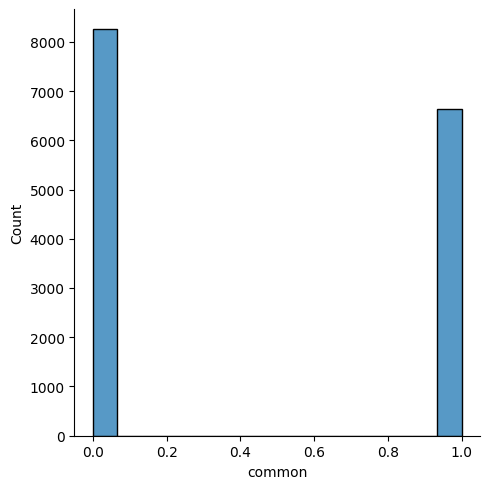

In [ ]:
sns.displot(df_word['common'])

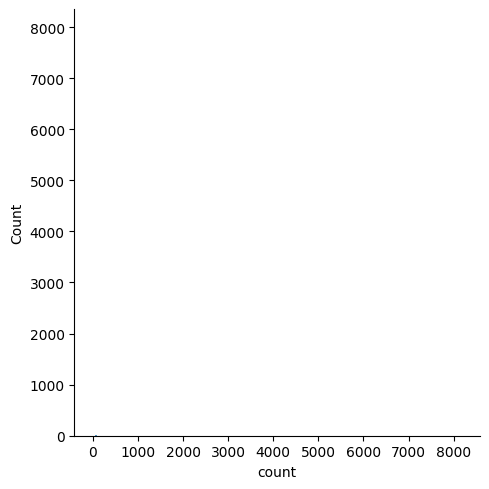

In [ ]:
sns.distplot(df_word['count'])

In [ ]:
df_word.to_csv('word_frequency.csv', index=False)
files.download('word_frequency.csv')

In [ ]:
pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

df_word[:100]

,word,count,common
0,you,8175,True
1,the,7473,True
2,and,6709,True
3,to,4928,True
4,of,4780,True
5,is,4767,True
6,in,4296,True
7,a,3847,True
8,are,3717,True
9,pakistan,3471,True


In [ ]:
pd.reset_option('display.max_rows')
#pd.reset_option('display.max_columns')
pd.reset_option('display.max_colwidth')